# Project: Wrangling and Analyze Data

In [412]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import requests
import json
import os

%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [10]:
# Download file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Store file
filename = url.split('/')[-1]
if not os.path.isfile(filename):
    with open(filename, mode='wb') as file:
        file.write(response.content)
    
# Read file into df
df_predictions = pd.read_csv(filename, sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Coult not/did not want to X's paid API access. Hence, I used the text file provided by Udacity


# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [22]:
# Read data from text file and convert it to a df
tweet_list = []
with open('tweet-json.txt', mode='r', encoding='utf-8') as file:
    for line in file:
        data = json.loads(line)
        tweet_list.append({
            'tweet_id'       : data['id_str'],
            'retweet_count'  : int(data['retweet_count']),
            'favorite_count' : int(data['favorite_count'])
        })

df_tweets = pd.DataFrame(tweet_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Archive table assessment

In [54]:
df_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [72]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [67]:
# How many non-categorized dogs do we have
df_archive[(df_archive['doggo']=='None') & (df_archive['floofer']=='None') & (df_archive['puppo']=='None') & (df_archive['pupper']=='None')].shape

(1976, 17)

In [69]:
df_archive.duplicated().sum()

0

In [99]:
# Check if all the ratings are correct by comparing to the text
df_tmp1 = df_archive['text'].str.extract('(\d+\/\d+)')[0].str.split('/').apply(lambda x: int(x[0]))
df_tmp2 = df_archive['text'].str.extract('(\d+\/\d+)')[0].str.split('/').apply(lambda x: int(x[1]))

print((df_archive['rating_numerator'] - df_tmp1).sum()) 
print((df_archive['rating_denominator'] - df_tmp2).sum()) 

0
0


#### Predictions Table

In [56]:
df_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [57]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [71]:
df_predictions['tweet_id'].duplicated().sum()

0

#### Tweets table

In [60]:
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [61]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Quality issues
1. tweet_id in archive table is int instead of string object

2. Remaining IDs in archive table (in_reply_to_status_id, retweeted_status_id, etc.) are floats instead of strings (e.g. retweeted_status_id of tweet nr. 20 is in scientific notation).

3. Timestamp in archive table is of type object instead of timedate.

4. We have about 181 retweets in the archive table, which are irrelevant for our analysis and would make the analysis more complicated if kept.

5. We have 2356 tweets but only about 2297 which contain images (expanded_urls), i.e. about 59 tweets are irrelevant since they do not contain images and might introduce false conclusions in the analysis.

6. In predictions table, tweet_id is an integer instead of a string object

7. The number of data in the predictions table is less than in the other tables - even when subtracting retweets and non-image containing tweets. It seems as if only tweets present in all three tables should be considered in the analysis since otherwise the analysis becomes difficult, error prone and maybe even wrong.

8. The vast majority of tweets do not contain a categorization into any of the dog type categories (only 380 rows have a categorization into doggo, pupper, etc.) but only states "None" which is a validity issue.

9. The dog stages are not categories but plain strings

### Tidiness issues
1. Dog type  in archive data (doggo, fluffer, etc.) is separated in 4 columns instead of one categorical column

2. Retweet count and favorite count in tweets table (obtained from API) are in separate table but should actually be part of the archive table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [351]:
# Make copies of original pieces of data
df_archive_clean     = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_tweets_clean      = df_tweets.copy()

### Issue #1:

#### Define: Convert tweet_id in archive table to string object

#### Code

In [352]:
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)

#### Test

In [353]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2:

#### Define: Convert remaining id columns in archive table from float to string

#### Code

In [354]:
# Define function which converts each row to string without touching NaNs
def convert_to_int(num):
    if not math.isnan(num):
        return '{:.0f}'.format(num) #, 'f')
    else:
        return num
    

In [355]:
# Convert float id columns to strings
float_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_status_id', 'in_reply_to_user_id']
for col in float_cols:
    df_archive_clean[col] = df_archive_clean[col].apply(convert_to_int)

#### Test

In [356]:
# Check row identified during visual assessment which contained float ids in scientific (exponential) notation
df_archive_clean.loc[19,float_cols] #(20)

retweeted_status_id         887473957103951872
retweeted_status_user_id            4196983835
in_reply_to_status_id                      NaN
in_reply_to_user_id                        NaN
Name: 19, dtype: object

In [357]:
# Also check types of rows
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   in_reply_to_status_id       78 non-null     object
 2   in_reply_to_user_id         78 non-null     object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         181 non-null    object
 7   retweeted_status_user_id    181 non-null    object
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  doggo                       2356 non-null   obje

### Issue #3

#### Define:  Convert timestamp column in archive table to timedate type.

#### Code

In [358]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [359]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [360]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #4

#### Define: Melt the dog category columns (doggo, floofer, etc.) into a single column.

#### Code

In [361]:
# Create list of columns that shall remain unchanged and a list of columns to be changed
id_vars     = list(df_archive_clean)[:-4]
modify_list = list(df_archive_clean)[-4:]

# Melt the columns, drop resulting 'None' duplicates
df_archive_clean = pd.melt(df_archive_clean, id_vars=id_vars, value_name="dog_stage", var_name="col").drop('col',axis=1).drop_duplicates()

# Fill 'None' with 'z' such that we only remove duplicates containing 'None' in last stage
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].str.replace('None','z')
df_archive_clean.sort_values('dog_stage', inplace=True)

# Remove remaining duplicate tweets
df_archive_clean = df_archive_clean[(~df_archive_clean['tweet_id'].duplicated())]

#### Test

In [362]:
df_archive_clean['dog_stage'].value_counts()

z          1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_stage, dtype: int64

In [363]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,819004803107983360,4196983835,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo
323,834089966724603904,NaN,NaN,2017-02-21 17:18:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...,NaN,NaN,NaN,https://twitter.com/stevekopack/status/8340866...,10,10,None,doggo
616,796484825502875648,NaN,NaN,2016-11-09 22:49:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy doggo that requested some assi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825...,12,10,None,doggo
624,795464331001561088,NaN,NaN,2016-11-07 03:14:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo
1141,727644517743104000,NaN,NaN,2016-05-03 23:42:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727644517...,13,10,None,doggo


### Issue #5

#### Define: Finish the previous step by also solving the validity issue, i.e. replacing 'None'/'z' by NaNs and make the whole dog_stage column categorical

#### Code

In [364]:
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].replace('z',np.nan)
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].astype('category')

#### Test

In [365]:
df_archive_clean['dog_stage'].isna().sum()

1976

In [366]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 446 to 1374
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64         

In [367]:
df_archive_clean['dog_stage'].value_counts()

pupper     245
doggo       97
puppo       29
floofer      9
Name: dog_stage, dtype: int64

### Issue #6

#### Define:  Merge/Join the tweets table and the archive table into a single table

#### Code

In [368]:
df_join = pd.merge(df_archive_clean, df_tweets_clean, on='tweet_id', how='inner')

#### Test

In [369]:
df_join.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,819015337530290176,NaN,NaN,2017-01-11 02:57:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,819004803107983360,4196983835,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,42228,0
1,834089966724603904,NaN,NaN,2017-02-21 17:18:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...,NaN,NaN,NaN,https://twitter.com/stevekopack/status/8340866...,10,10,None,doggo,2427,10971
2,796484825502875648,NaN,NaN,2016-11-09 22:49:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy doggo that requested some assi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825...,12,10,None,doggo,2042,8472
3,795464331001561088,NaN,NaN,2016-11-07 03:14:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,27728,55683
4,727644517743104000,NaN,NaN,2016-05-03 23:42:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727644517...,13,10,None,doggo,1962,6431


In [370]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2354 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2354 non-null   datetime64[ns, UTC]
 4   source                      2354 non-null   object             
 5   text                        2354 non-null   object             
 6   retweeted_status_id         179 non-null    object             
 7   retweeted_status_user_id    179 non-null    object             
 8   retweeted_status_timestamp  179 non-null    object             
 9   expanded_urls               2295 non-null   object             
 10  rating_numerator            2354 non-null   int64           

### Issue #7

#### Define: Remove the retweets from the newlyy generated joined archive+tweets table based on presence of retweeted_status_id. Subsequently drop the now irrelevant columns connected to retweets

#### Code

In [371]:
df_join = df_join[df_join['retweeted_status_id'].isna()].copy()
df_join.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [372]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 1 to 2353
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     object             
 2   in_reply_to_user_id    78 non-null     object             
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  dog_stage              344 non-null    category           
 11  retweet_count          2175 non-null   int64            

### Issue #8

#### Define: Remove the non-image containing rows joined table based on presence of expanded_urls. Subsequently drop the now irrelevant column 'expanded_urls'

#### Code

In [373]:
df_join = df_join[~df_join['expanded_urls'].isna()].copy()
df_join.drop('expanded_urls', axis=1, inplace=True)

#### Test

In [374]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 1 to 2353
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2117 non-null   object             
 1   in_reply_to_status_id  23 non-null     object             
 2   in_reply_to_user_id    23 non-null     object             
 3   timestamp              2117 non-null   datetime64[ns, UTC]
 4   source                 2117 non-null   object             
 5   text                   2117 non-null   object             
 6   rating_numerator       2117 non-null   int64              
 7   rating_denominator     2117 non-null   int64              
 8   name                   2117 non-null   object             
 9   dog_stage              338 non-null    category           
 10  retweet_count          2117 non-null   int64              
 11  favorite_count         2117 non-null   int64            

### Issue #9

#### Define: Convert tweet_id in predictions table from int to string

#### Code

In [376]:
df_predictions_clean['tweet_id'] = df_predictions_clean['tweet_id'].astype(str)

#### Test

In [377]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #10

#### Define: Match all tweets in the predictions table to the ones in the joined archive+tweets table to have a common data basis which we can work with. This is for tidying as well as for cleaning since we are only interested in tweets we performed predictions on and can/want to neglect all others since there apparently were some missed in the neural network. Since the number of discarded data is small, this is a proper way to make the analysis easier.
Do so by performing an inner join.

#### Code

In [379]:
df_master = pd.merge(df_join, df_predictions_clean, on='tweet_id', how='inner')

#### Test

In [380]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,796484825502875648,NaN,NaN,2016-11-09 22:49:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy doggo that requested some assi...,12,10,None,doggo,...,1,cocker_spaniel,0.116924,True,seat_belt,0.107511,False,Australian_terrier,0.099843,True
1,795464331001561088,NaN,NaN,2016-11-07 03:14:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,13,10,None,doggo,...,1,golden_retriever,0.193082,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,0.124684,True
2,727644517743104000,NaN,NaN,2016-05-03 23:42:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,13,10,None,doggo,...,2,Great_Pyrenees,0.457164,True,kuvasz,0.391710,True,Labrador_retriever,0.094523,True
3,834574053763584002,NaN,NaN,2017-02-23 01:22:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo fully pupared for a shower. H*c...,13,10,None,doggo,...,1,toilet_tissue,0.262936,False,golden_retriever,0.226564,True,bathtub,0.078879,False
4,732375214819057664,NaN,NaN,2016-05-17 01:00:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,11,10,Kyle,doggo,...,1,tennis_ball,0.998673,False,basset,0.000547,True,golden_retriever,0.000360,True


In [381]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     object             
 2   in_reply_to_user_id    23 non-null     object             
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   rating_numerator       1994 non-null   int64              
 7   rating_denominator     1994 non-null   int64              
 8   name                   1994 non-null   object             
 9   dog_stage              306 non-null    category           
 10  retweet_count          1994 non-null   int64              
 11  favorite_count         1994 non-null   int64            

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [383]:
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

For the analysis we use the master data frame which contains the merged predictions as well as the cleaned and melted dog_stage data, which originally were part of the twitter archive table andd then after cleaning also merged into the master dataframe. Furthermore, only tweets which were present in the predictioins as well as well as the archive tables were used to make sure we have a common data basis and only consider tweets which actually contain images.

In [390]:
# Compute percentages of dog predictions
print('P1 dog nr.', df_master['p1_dog'].sum())
print('P1 dog predictions [%]', df_master['p1_dog'].mean())
print('P2 dog nr.', df_master['p2_dog'].sum())
print('P2 dog predictions [%]', df_master['p2_dog'].mean())
print('P3 dog nr.', df_master['p3_dog'].sum())
print('P1 dog predictions [%]', df_master['p3_dog'].mean())

P1 dog nr. 1477
P1 dog predictions [%] 0.7407221664994985
P2 dog nr. 1495
P2 dog predictions [%] 0.7497492477432297
P3 dog nr. 1446
P1 dog predictions [%] 0.7251755265797393


In [396]:
# Check the differences between p1, p2 and p3 predictions
print('p1_dog=False & p2_dog=True: ', df_master[(df_master['p1_dog']==False) 
                                                & (df_master['p2_dog']==True)]['p2_dog'].count())
print('p1_dog=False & p2_dog=False & p3_dog=True: ', df_master[(df_master['p1_dog']==False) 
                                                              & (df_master['p2_dog']==False)
                                                              & (df_master['p3_dog']==True)]['p2_dog'].count())
print('p1_dog=False & p2_dog=False & p3_dog=False: ', df_master[(df_master['p1_dog']==False) 
                                                              & (df_master['p2_dog']==False)
                                                              & (df_master['p3_dog']==False)]['p2_dog'].count())

p1_dog=False & p2_dog=True:  147
p1_dog=False & p2_dog=False & p3_dog=True:  62
p1_dog=False & p2_dog=False & p3_dog=False:  308


In [405]:
# How many of the images which can be rather certain about being dog images (we have dog_stages) were predicted as dogs
# Actually, in the case here only p1 is of relevance since we usually base our trust in a prediction
# on the prediction with the highest contribution/certainty

print('Correct doggo predictions [%]: ', df_master[(df_master['p1_dog']==True) 
                & (df_master['dog_stage']=='doggo')]['p2_dog'].count()
      /df_master[df_master['dog_stage']=='doggo']['p2_dog'].count())

print('Correct floofer predictions [%]: ', df_master[(df_master['p1_dog']==True) 
                & (df_master['dog_stage']=='floofer')]['p2_dog'].count()
      /df_master[df_master['dog_stage']=='floofer']['p2_dog'].count())

print('Correct pupper predictions [%]: ', df_master[(df_master['p1_dog']==True) 
                & (df_master['dog_stage']=='pupper')]['p2_dog'].count()
      /df_master[df_master['dog_stage']=='pupper']['p2_dog'].count())

print('Correct puppo predictions [%]: ', df_master[(df_master['p1_dog']==True) 
                & (df_master['dog_stage']=='puppo')]['p2_dog'].count()
      /df_master[df_master['dog_stage']=='puppo']['p2_dog'].count())

Correct doggo predictions [%]:  0.7837837837837838
Correct floofer predictions [%]:  1.0
Correct pupper predictions [%]:  0.7093596059113301
Correct puppo predictions [%]:  0.8636363636363636


### Insights:
1. The neural network predicts around 74 % of the images as dog images which is quite a good accuracy under the assumption that all images refer to dogs. But as some images do not refer to actual dogs, also the neural networks actual accuracy might be higher than we might expect from the data we have access to.

2. The second and third predictions (p2 and p3) predict a very similar amount of dog images, i.e. at first glance it seems like most of the time all three predictions coincide. 

3. In around 147 cases the neural network would not have predicted a dog according to p1 but according to p2, whereas in the case of p1 and p2 not predicting a dog, the number of times p3 predicts reduces to 62. These cases could possible be interpreted as cases where the uncertainty in the predictions is large.

4. In more than 15 % (308) of the predictions the neural network seems to be rather "certain" that there is no dog in the image.

5. Dogs in the floofer stage seem to be easiest to predict from what we can conclude with our data. They are predicted as dogs with 100 % accuracy. The pupper stage does on the other hand seem the most difficult to predict since they are only in 70 % of the cases identified as dogs. Apart from the pupper stage, the remaining dog stages were predicted more often accurately than the predictions over the entire dataset. However, a very important weakness of this analysis is that only about 15 % of the data of our dataset have such a categorization and, hence, analyzing only the "verified" dogs (verified in terms of having assigned a dog stage) also implies working with a very small sample of our already rather small population.

### Visualization

In [421]:
dog_stage_predictions = (df_master[df_master['p1_dog']==True].groupby('dog_stage')['dog_stage'].count()
                         /df_master.groupby('dog_stage')['dog_stage'].count()).values

[0.78378378 1.         0.70935961 0.86363636] ['doggo', 'floofer', 'pupper', 'puppo']


Text(0.5, 1.0, 'Comparison of neural network predictive power for different dog stages')

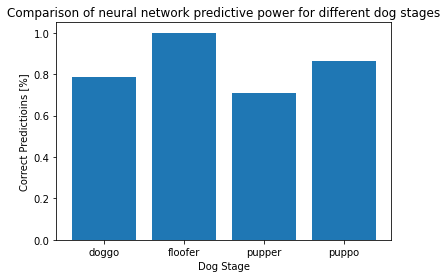

In [424]:
plt.bar(modify_list, dog_stage_predictions);
plt.xlabel('Dog Stage')
plt.ylabel('Correct Predictioins [%]')
plt.title('Comparison of neural network predictive power for different dog stages')